In [1]:
from matplotlib import pyplot as pylt
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy import stats

In [2]:
df = pd.read_csv('C:/Users/simon/Desktop/Ergebnisse/function_values.csv')

Fill NaN values with overall dataset mean. Might be better to remove/zero out?

In [3]:
print(f'Filling {df[df.isna().any(axis=1)].shape[0]} instances containing NaN values.')

Filling 36 instances containing NaN values.


In [4]:
d = defaultdict()
for column in df.columns:
    d[column] = df[column].mean()

In [5]:
df.fillna(value=d, inplace=True)

Filter out extreme outliers (deviating more than 5 standard deviations from the mean).

In [6]:
numrows = df.shape[0]
df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
print(f'Filtered out {numrows - df.shape[0]} instances.')

Filtered out 7 instances.


In [7]:
df

,dir,ecLF,ccLF,icLF,ecMF,ccMF,icMF,pLF,pMF,aF,...,eLT.aMiv,aMT.aSD,aMT.aMav,aMT.aMiv,ccLF.aSD,ccLF.aMav,ccLF.aMiv,aLT.aSD,aLT.aMav,aLT.aMiv
0,9162498.0,4.038151,7.886265,6.614995,5.921745,8.293496,6.749604,8.047362,8.625975,19.920264,...,2.115987,0.981813,5.439945,1.903054,0.852800,9.196789,5.706463,0.818157,3.735808,0.604512
1,9211751.0,3.707627,7.191495,8.190217,5.865766,8.611756,7.107226,8.493118,9.924344,22.474260,...,1.499510,1.404885,6.251328,1.373030,1.589097,10.726982,4.132722,1.124346,5.882201,1.400214
2,9230284.0,4.132225,6.654769,5.509443,4.523861,5.895048,5.321595,9.644368,6.458609,22.513084,...,0.909550,2.176531,9.233726,1.392819,0.510843,7.512616,5.312098,1.043845,5.256172,1.255675
3,9156526.0,3.260782,5.601581,5.346605,3.999922,7.110363,6.807446,8.186828,7.635622,16.377629,...,0.232923,1.424362,5.338707,0.947357,0.748715,6.967388,4.082503,0.923331,4.219024,0.360198
4,9246518.0,4.391637,6.372412,5.977629,5.694244,7.527829,6.504206,8.483823,9.126760,20.968079,...,1.431525,1.872313,8.212994,1.407380,0.593623,7.204227,4.685891,0.622402,4.794976,2.291971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,9141244.0,3.170823,5.945800,7.413022,4.983540,7.986702,8.341674,8.423109,8.407739,24.419762,...,1.334887,1.297588,5.696934,1.091950,1.393293,8.234426,3.240230,1.330852,6.369566,1.625704
503,9001104.0,2.559579,2.978711,5.770599,3.852157,5.077803,4.702885,7.919154,6.343194,20.139295,...,1.769494,1.121914,5.161562,0.922908,0.979378,5.588864,1.653365,0.743617,3.971110,1.363304
504,9034644.0,2.054989,4.430400,5.774864,3.820098,6.279646,7.246969,6.736593,7.264079,30.125516,...,1.652817,2.328551,9.284491,1.694009,0.957078,6.102488,2.707400,0.896668,4.977665,1.204406
505,9109448.0,5.850110,9.456697,8.934657,4.066164,5.769433,6.700263,9.144307,8.839872,19.423300,...,0.986090,2.150615,9.204488,1.413111,0.826631,10.552040,7.259581,1.293778,6.512670,1.120368


In [8]:
df.columns

Index(['dir', 'ecLF', 'ccLF', 'icLF', 'ecMF', 'ccMF', 'icMF', 'pLF', 'pMF',
       'aF', 'eLT', 'pLT', 'iLT', 'aLT', 'cLT', 'eMT', 'pMT', 'iMT', 'aMT',
       'cMT', 'iMT.aSD', 'iMT.aMav', 'iMT.aMiv', 'icLF.aSD', 'icLF.aMav',
       'icLF.aMiv', 'pLF.aSD', 'pLF.aMav', 'pLF.aMiv', 'pLT.aSD', 'pLT.aMav',
       'pLT.aMiv', 'cLT.aSD', 'cLT.aMav', 'cLT.aMiv', 'pMT.aSD', 'pMT.aMav',
       'pMT.aMiv', 'pMF.aSD', 'pMF.aMav', 'pMF.aMiv', 'icMF.aSD', 'icMF.aMav',
       'icMF.aMiv', 'ecMF.aSD', 'ecMF.aMav', 'ecMF.aMiv', 'ccMF.aSD',
       'ccMF.aMav', 'ccMF.aMiv', 'iLT.aSD', 'iLT.aMav', 'iLT.aMiv', 'eMT.aSD',
       'eMT.aMav', 'eMT.aMiv', 'cMT.aSD', 'cMT.aMav', 'cMT.aMiv', 'ecLF.aSD',
       'ecLF.aMav', 'ecLF.aMiv', 'aF.aSD', 'aF.aMav', 'aF.aMiv', 'eLT.aSD',
       'eLT.aMav', 'eLT.aMiv', 'aMT.aSD', 'aMT.aMav', 'aMT.aMiv', 'ccLF.aSD',
       'ccLF.aMav', 'ccLF.aMiv', 'aLT.aSD', 'aLT.aMav', 'aLT.aMiv'],
      dtype='object')

In [9]:
eclf = df['ecLF']
cclf = df['ccLF']
iclf = df['icLF']
icmf = df['icMF']
ccmf = df['ccMF']
ecmf = df['ecMF']

elt = df['eLT']
plt = df['pLT']
ilt = df['iLT']
alt = df['aLT']
clt = df['cLT']

emt = df['eMT']
pmt = df['pMT']
imt = df['iMT']
amt = df['aMT']
cmt = df['cMT']

In [10]:
xs = np.arange(0, df.shape[0])
len(xs)

500

# Mesh

## Subregion scatters

### Femur

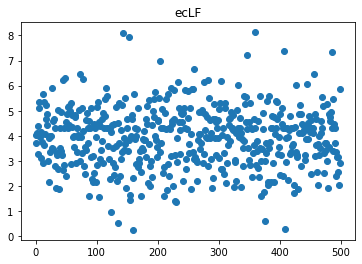

In [11]:
ys = eclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

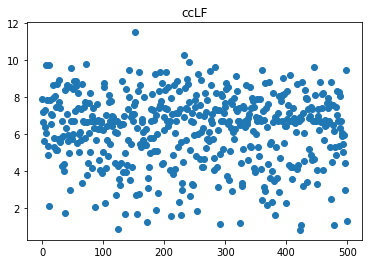

In [12]:
ys = cclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

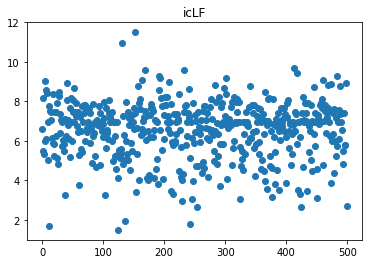

In [13]:
ys = iclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

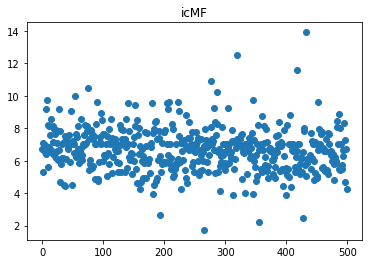

In [14]:
ys = icmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

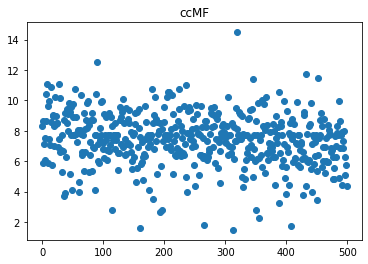

In [15]:
ys = ccmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

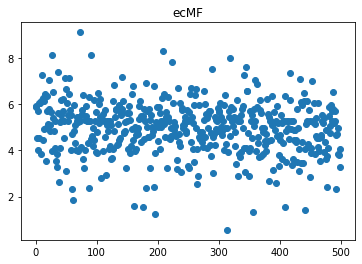

In [16]:
ys = ecmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

### Tibia

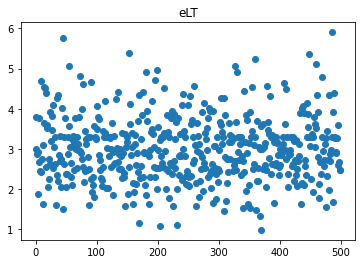

In [17]:
ys = elt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

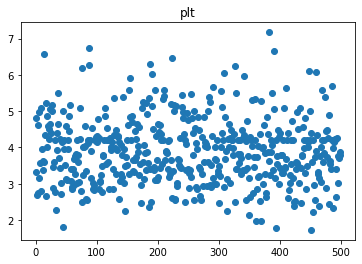

In [18]:
ys = plt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('plt')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

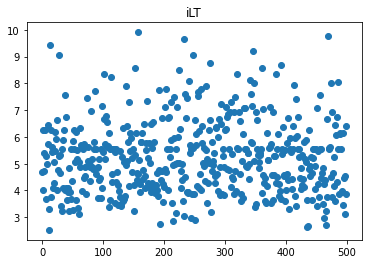

In [19]:
ys = ilt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

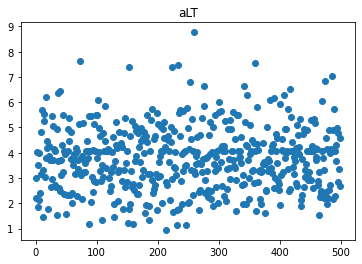

In [20]:
ys = alt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

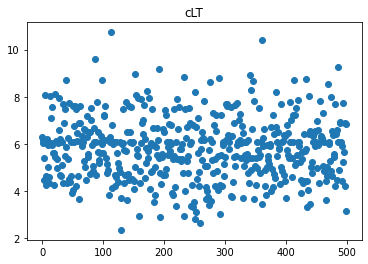

In [21]:
ys = clt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

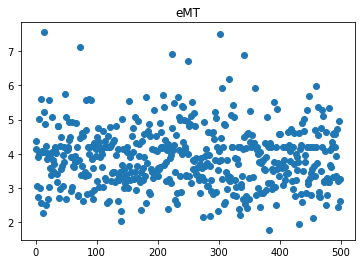

In [22]:
ys = emt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

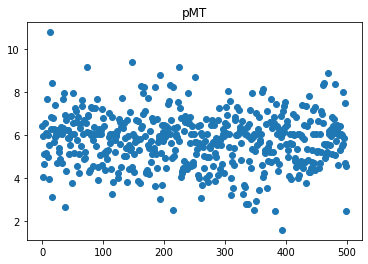

In [23]:
ys = pmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

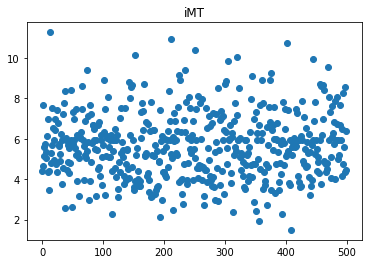

In [24]:
ys = imt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

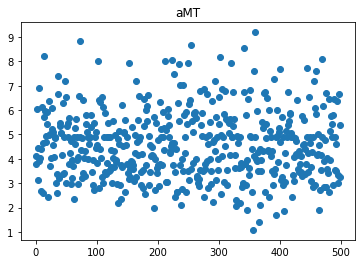

In [25]:
ys = amt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

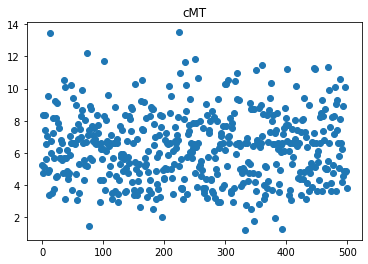

In [26]:
ys = cmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

## Subregion boxplots

### Femur

Segmentation 9745458.0 is an outlier (3.49 total deviation from median)
Segmentation 9750090.0 is an outlier (4.07 total deviation from median)
Segmentation 9606490.0 is an outlier (3.90 total deviation from median)
Segmentation 9604541.0 is an outlier (3.77 total deviation from median)
Segmentation 9341240.0 is an outlier (3.20 total deviation from median)
Segmentation 9388068.0 is an outlier (4.10 total deviation from median)
Segmentation 9379276.0 is an outlier (3.40 total deviation from median)
Segmentation 9102858.0 is an outlier (3.37 total deviation from median)
Segmentation 9030718.0 is an outlier (3.73 total deviation from median)
Segmentation 9130672.0 is an outlier (3.31 total deviation from median)


Text(0.5, 1.0, 'ecLF')

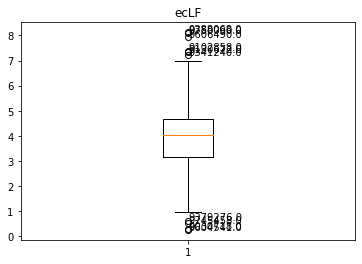

In [27]:
ys = eclf.to_numpy()
pylt.boxplot(ys)
q1 = eclf.quantile(.25)
q3 = eclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - eclf.median()):.2f} total deviation from median)')
        
pylt.title('ecLF')

Segmentation 9943227.0 is an outlier (5.85 total deviation from median)
Segmentation 9606490.0 is an outlier (4.81 total deviation from median)
Segmentation 9905024.0 is an outlier (5.46 total deviation from median)
Segmentation 9422381.0 is an outlier (5.57 total deviation from median)
Segmentation 9389580.0 is an outlier (5.50 total deviation from median)
Segmentation 9078486.0 is an outlier (5.88 total deviation from median)
Segmentation 9044005.0 is an outlier (5.59 total deviation from median)
Segmentation 9053047.0 is an outlier (5.62 total deviation from median)
Segmentation 9101066.0 is an outlier (5.38 total deviation from median)


Text(0.5, 1.0, 'ccLF')

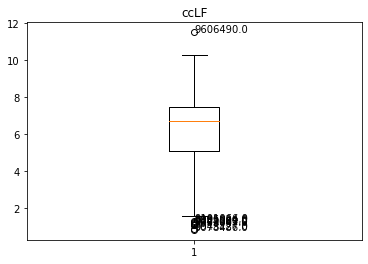

In [28]:
ys = cclf.to_numpy()
pylt.boxplot(ys)
q1 = cclf.quantile(.25)
q3 = cclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cclf.median()):.2f} total deviation from median)')
        
pylt.title('ccLF')

Segmentation 9215922.0 is an outlier (5.14 total deviation from median)
Segmentation 9230504.0 is an outlier (3.60 total deviation from median)
Segmentation 9988421.0 is an outlier (3.61 total deviation from median)
Segmentation 9943227.0 is an outlier (5.37 total deviation from median)
Segmentation 9908089.0 is an outlier (4.13 total deviation from median)
Segmentation 9745458.0 is an outlier (4.94 total deviation from median)
Segmentation 9606490.0 is an outlier (4.65 total deviation from median)
Segmentation 9486827.0 is an outlier (3.89 total deviation from median)
Segmentation 9441432.0 is an outlier (5.05 total deviation from median)
Segmentation 9475286.0 is an outlier (3.79 total deviation from median)
Segmentation 9413071.0 is an outlier (4.22 total deviation from median)
Segmentation 9389580.0 is an outlier (3.81 total deviation from median)
Segmentation 9327065.0 is an outlier (3.69 total deviation from median)
Segmentation 9044005.0 is an outlier (4.18 total deviation from 

Text(0.5, 1.0, 'icLF')

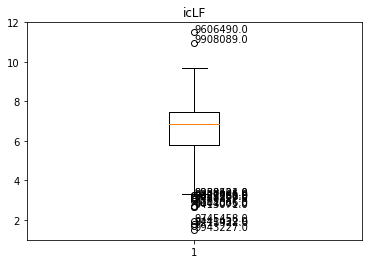

In [29]:
ys = iclf.to_numpy()
pylt.boxplot(ys)
q1 = iclf.quantile(.25)
q3 = iclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - iclf.median()):.2f} total deviation from median)')
        
pylt.title('icLF')

Segmentation 9186589.0 is an outlier (3.05 total deviation from median)
Segmentation 9180558.0 is an outlier (3.28 total deviation from median)
Segmentation 9256759.0 is an outlier (3.78 total deviation from median)
Segmentation 9241424.0 is an outlier (2.90 total deviation from median)
Segmentation 9672573.0 is an outlier (4.07 total deviation from median)
Segmentation 9481413.0 is an outlier (2.93 total deviation from median)
Segmentation 9448315.0 is an outlier (2.89 total deviation from median)
Segmentation 9517311.0 is an outlier (4.97 total deviation from median)
Segmentation 9453274.0 is an outlier (4.21 total deviation from median)
Segmentation 9407052.0 is an outlier (3.54 total deviation from median)
Segmentation 9329062.0 is an outlier (5.79 total deviation from median)
Segmentation 9332345.0 is an outlier (3.05 total deviation from median)
Segmentation 9393987.0 is an outlier (4.48 total deviation from median)
Segmentation 9049223.0 is an outlier (4.85 total deviation from 

Text(0.5, 1.0, 'icMF')

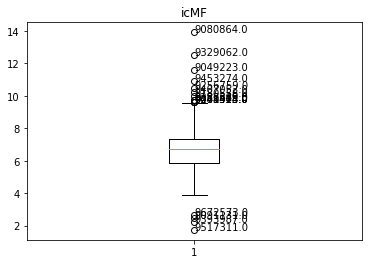

In [30]:
ys = icmf.to_numpy()
pylt.boxplot(ys)
q1 = icmf.quantile(.25)
q3 = icmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - icmf.median()):.2f} total deviation from median)')
        
pylt.title('icMF')

Segmentation 9241424.0 is an outlier (4.91 total deviation from median)
Segmentation 9858216.0 is an outlier (4.83 total deviation from median)
Segmentation 9781749.0 is an outlier (5.97 total deviation from median)
Segmentation 9672573.0 is an outlier (4.93 total deviation from median)
Segmentation 9691663.0 is an outlier (4.77 total deviation from median)
Segmentation 9517311.0 is an outlier (5.77 total deviation from median)
Segmentation 9375317.0 is an outlier (6.11 total deviation from median)
Segmentation 9329062.0 is an outlier (6.89 total deviation from median)
Segmentation 9371267.0 is an outlier (4.79 total deviation from median)
Segmentation 9393987.0 is an outlier (5.32 total deviation from median)
Segmentation 9344856.0 is an outlier (4.34 total deviation from median)
Segmentation 9048192.0 is an outlier (5.84 total deviation from median)
Segmentation 9080864.0 is an outlier (4.12 total deviation from median)


Text(0.5, 1.0, 'ccMF')

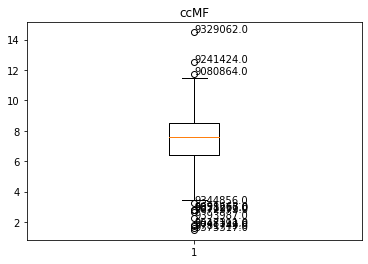

In [31]:
ys = ccmf.to_numpy()
pylt.boxplot(ys)
q1 = ccmf.quantile(.25)
q3 = ccmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ccmf.median()):.2f} total deviation from median)')
        
pylt.title('ccMF')

Segmentation 9223980.0 is an outlier (3.02 total deviation from median)
Segmentation 9204055.0 is an outlier (3.25 total deviation from median)
Segmentation 9249025.0 is an outlier (4.01 total deviation from median)
Segmentation 9241424.0 is an outlier (3.01 total deviation from median)
Segmentation 9781749.0 is an outlier (3.50 total deviation from median)
Segmentation 9760079.0 is an outlier (3.57 total deviation from median)
Segmentation 9691663.0 is an outlier (3.88 total deviation from median)
Segmentation 9481413.0 is an outlier (3.18 total deviation from median)
Segmentation 9518267.0 is an outlier (2.70 total deviation from median)
Segmentation 9375317.0 is an outlier (4.55 total deviation from median)
Segmentation 9329062.0 is an outlier (2.87 total deviation from median)
Segmentation 9393987.0 is an outlier (3.75 total deviation from median)
Segmentation 9048192.0 is an outlier (3.54 total deviation from median)
Segmentation 9139557.0 is an outlier (3.66 total deviation from 

Text(0.5, 1.0, 'ecMF')

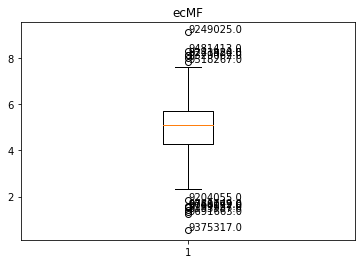

In [32]:
ys = ecmf.to_numpy()
pylt.boxplot(ys)
q1 = ecmf.quantile(.25)
q3 = ecmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ecmf.median()):.2f} total deviation from median)')
        
pylt.title('ecMF')

### Tibia

Segmentation 9223789.0 is an outlier (2.81 total deviation from median)
Segmentation 9180558.0 is an outlier (2.10 total deviation from median)
Segmentation 9249025.0 is an outlier (1.85 total deviation from median)
Segmentation 9606490.0 is an outlier (2.44 total deviation from median)
Segmentation 9766939.0 is an outlier (1.94 total deviation from median)
Segmentation 9566781.0 is an outlier (1.99 total deviation from median)
Segmentation 9478504.0 is an outlier (1.90 total deviation from median)
Segmentation 9376280.0 is an outlier (2.10 total deviation from median)
Segmentation 9397988.0 is an outlier (1.94 total deviation from median)
Segmentation 9388068.0 is an outlier (2.27 total deviation from median)
Segmentation 9365968.0 is an outlier (1.99 total deviation from median)
Segmentation 9003430.0 is an outlier (2.40 total deviation from median)
Segmentation 9115742.0 is an outlier (2.14 total deviation from median)
Segmentation 9130672.0 is an outlier (2.94 total deviation from 

Text(0.5, 1.0, 'eLT')

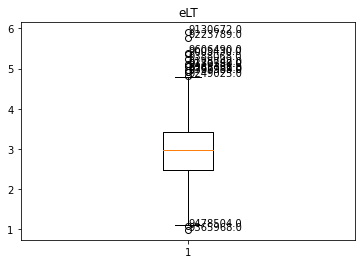

In [33]:
ys = elt.to_numpy()
pylt.boxplot(ys)
q1 = elt.quantile(.25)
q3 = elt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - elt.median()):.2f} total deviation from median)')
        
pylt.title('eLT')

Segmentation 9154793.0 is an outlier (2.70 total deviation from median)
Segmentation 9256759.0 is an outlier (2.32 total deviation from median)
Segmentation 9258562.0 is an outlier (2.87 total deviation from median)
Segmentation 9152295.0 is an outlier (2.40 total deviation from median)
Segmentation 9933836.0 is an outlier (2.43 total deviation from median)
Segmentation 9518267.0 is an outlier (2.60 total deviation from median)
Segmentation 9376280.0 is an outlier (2.38 total deviation from median)
Segmentation 9314341.0 is an outlier (3.31 total deviation from median)
Segmentation 9323079.0 is an outlier (2.79 total deviation from median)
Segmentation 9003430.0 is an outlier (2.23 total deviation from median)
Segmentation 9115742.0 is an outlier (2.22 total deviation from median)


Text(0.5, 1.0, 'pLT')

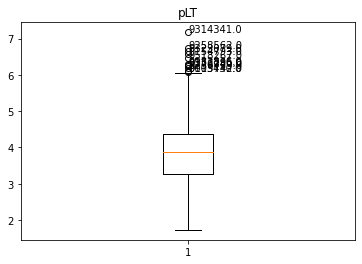

In [34]:
ys = plt.to_numpy()
pylt.boxplot(ys)
q1 = plt.quantile(.25)
q3 = plt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plt.median()):.2f} total deviation from median)')
        
pylt.title('pLT')

Segmentation 9154793.0 is an outlier (4.27 total deviation from median)
Segmentation 9223980.0 is an outlier (3.93 total deviation from median)
Segmentation 9987407.0 is an outlier (4.76 total deviation from median)
Segmentation 9468561.0 is an outlier (4.49 total deviation from median)
Segmentation 9526396.0 is an outlier (3.91 total deviation from median)
Segmentation 9481628.0 is an outlier (3.62 total deviation from median)
Segmentation 9332345.0 is an outlier (4.07 total deviation from median)
Segmentation 9323079.0 is an outlier (3.54 total deviation from median)
Segmentation 9094693.0 is an outlier (4.60 total deviation from median)


Text(0.5, 1.0, 'iLT')

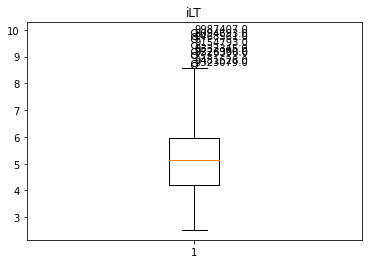

In [35]:
ys = ilt.to_numpy()
pylt.boxplot(ys)
q1 = ilt.quantile(.25)
q3 = ilt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ilt.median()):.2f} total deviation from median)')
        
pylt.title('iLT')

Segmentation 9249025.0 is an outlier (3.82 total deviation from median)
Segmentation 9606490.0 is an outlier (3.59 total deviation from median)
Segmentation 9518267.0 is an outlier (3.59 total deviation from median)
Segmentation 9468561.0 is an outlier (3.68 total deviation from median)
Segmentation 9494867.0 is an outlier (4.98 total deviation from median)
Segmentation 9388068.0 is an outlier (3.77 total deviation from median)
Segmentation 9130672.0 is an outlier (3.23 total deviation from median)


Text(0.5, 1.0, 'aLT')

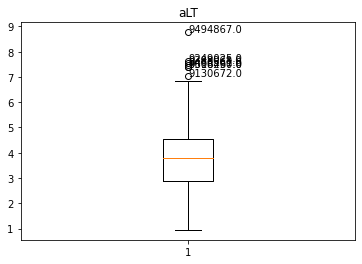

In [36]:
ys = alt.to_numpy()
pylt.boxplot(ys)
q1 = alt.quantile(.25)
q3 = alt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - alt.median()):.2f} total deviation from median)')
        
pylt.title('aLT')

Segmentation 9258562.0 is an outlier (3.70 total deviation from median)
Segmentation 9817241.0 is an outlier (4.85 total deviation from median)
Segmentation 9556464.0 is an outlier (3.31 total deviation from median)
Segmentation 9388068.0 is an outlier (4.55 total deviation from median)
Segmentation 9130672.0 is an outlier (3.38 total deviation from median)


Text(0.5, 1.0, 'cLT')

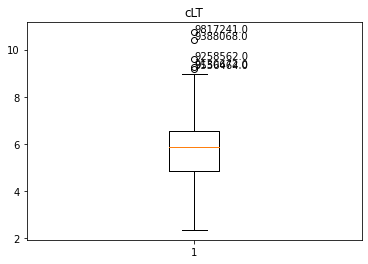

In [37]:
ys = clt.to_numpy()
pylt.boxplot(ys)
q1 = clt.quantile(.25)
q3 = clt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - clt.median()):.2f} total deviation from median)')
        
pylt.title('cLT')

Segmentation 9154793.0 is an outlier (3.72 total deviation from median)
Segmentation 9249025.0 is an outlier (3.29 total deviation from median)
Segmentation 9518267.0 is an outlier (3.07 total deviation from median)
Segmentation 9534875.0 is an outlier (2.87 total deviation from median)
Segmentation 9302260.0 is an outlier (3.65 total deviation from median)
Segmentation 9356006.0 is an outlier (2.35 total deviation from median)
Segmentation 9311328.0 is an outlier (3.06 total deviation from median)
Segmentation 9115742.0 is an outlier (2.15 total deviation from median)


Text(0.5, 1.0, 'eMT')

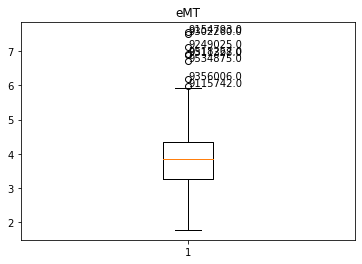

In [38]:
ys = emt.to_numpy()
pylt.boxplot(ys)
q1 = emt.quantile(.25)
q3 = emt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - emt.median()):.2f} total deviation from median)')
        
pylt.title('eMT')

Segmentation 9154793.0 is an outlier (4.87 total deviation from median)
Segmentation 9249025.0 is an outlier (3.26 total deviation from median)
Segmentation 9862541.0 is an outlier (3.50 total deviation from median)
Segmentation 9410190.0 is an outlier (3.39 total deviation from median)
Segmentation 9518267.0 is an outlier (3.27 total deviation from median)
Segmentation 9341240.0 is an outlier (3.41 total deviation from median)
Segmentation 9330729.0 is an outlier (3.45 total deviation from median)
Segmentation 9319367.0 is an outlier (4.33 total deviation from median)
Segmentation 9094693.0 is an outlier (2.96 total deviation from median)
Segmentation 9109448.0 is an outlier (3.47 total deviation from median)


Text(0.5, 1.0, 'pMT')

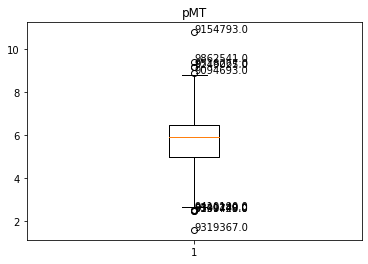

In [39]:
ys = pmt.to_numpy()
pylt.boxplot(ys)
q1 = pmt.quantile(.25)
q3 = pmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmt.median()):.2f} total deviation from median)')
        
pylt.title('pMT')

Segmentation 9154793.0 is an outlier (5.67 total deviation from median)
Segmentation 9606490.0 is an outlier (4.53 total deviation from median)
Segmentation 9458093.0 is an outlier (5.31 total deviation from median)
Segmentation 9534875.0 is an outlier (4.79 total deviation from median)
Segmentation 9369286.0 is an outlier (4.45 total deviation from median)
Segmentation 9122643.0 is an outlier (5.13 total deviation from median)
Segmentation 9024940.0 is an outlier (4.34 total deviation from median)


Text(0.5, 1.0, 'iMT')

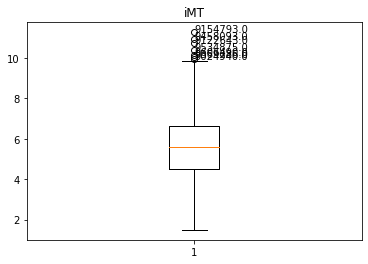

In [40]:
ys = imt.to_numpy()
pylt.boxplot(ys)
q1 = imt.quantile(.25)
q3 = imt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - imt.median()):.2f} total deviation from median)')
        
pylt.title('iMT')

Segmentation 9249025.0 is an outlier (4.26 total deviation from median)
Segmentation 9484408.0 is an outlier (4.10 total deviation from median)
Segmentation 9311328.0 is an outlier (3.99 total deviation from median)
Segmentation 9388068.0 is an outlier (4.64 total deviation from median)


Text(0.5, 1.0, 'aMT')

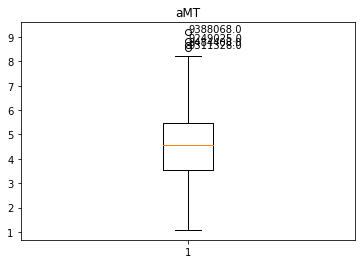

In [41]:
ys = amt.to_numpy()
pylt.boxplot(ys)
q1 = amt.quantile(.25)
q3 = amt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - amt.median()):.2f} total deviation from median)')
        
pylt.title('aMT')

Segmentation 9154793.0 is an outlier (6.91 total deviation from median)
Segmentation 9249025.0 is an outlier (5.67 total deviation from median)
Segmentation 9518267.0 is an outlier (6.97 total deviation from median)


Text(0.5, 1.0, 'cMT')

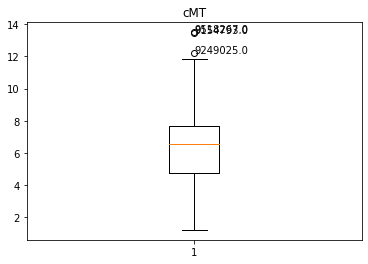

In [42]:
ys = cmt.to_numpy()
pylt.boxplot(ys)
q1 = cmt.quantile(.25)
q3 = cmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cmt.median()):.2f} total deviation from median)')
        
pylt.title('cMT')